In [15]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [16]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [17]:
train_dataset = train.flow_from_directory("/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Binary-Image-Classification-Using-Keras/dataset/training_set",
                                        target_size = (150,150), batch_size = 32, class_mode = 'binary')

test_dataset = test.flow_from_directory("/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Binary-Image-Classification-Using-Keras/dataset/test_set",
                                        target_size = (150,150), batch_size = 32, class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [18]:
test_dataset.class_indices

{'cats': 0, 'dogs': 1}

In [19]:
## CREATING THE IMAGE CLASSIFIER CNN MODEL

In [20]:
model = keras.Sequential()

#Covolution layer and Max Pool layer 1
model.add(keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

#Covolution layer and Max Pool layer 2
model.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))


#Covolution layer and Max Pool layer 3
model.add(keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))


#Covolution layer and Max Pool layer 4
model.add(keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))


#Converting the multidimensional image data array into 1d array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [21]:
# Defining the optimizer and the loss function. 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Optimizers are used to reduce losses when loss is high by changing the learning rate of the model and is used to measure how good our model predicted output when compared with true output

In [22]:
# Training the Model

model.fit_generator(train_dataset,
         steps_per_epoch = 250,
         epochs = 10,
         validation_data = test_dataset
       
         )

Epoch 1/10
250/250 [==============================] - 113s 453ms/step - loss: 0.6905 - acc: 0.5353 - val_loss: 0.6742 - val_acc: 0.6020
Epoch 2/10
250/250 [==============================] - 123s 492ms/step - loss: 0.6361 - acc: 0.6334 - val_loss: 0.5752 - val_acc: 0.7115
Epoch 3/10
250/250 [==============================] - 121s 485ms/step - loss: 0.5670 - acc: 0.6989 - val_loss: 0.5343 - val_acc: 0.7390
Epoch 4/10
250/250 [==============================] - 130s 519ms/step - loss: 0.5182 - acc: 0.7414 - val_loss: 0.4975 - val_acc: 0.7590
Epoch 5/10
250/250 [==============================] - 128s 512ms/step - loss: 0.4552 - acc: 0.7839 - val_loss: 0.4454 - val_acc: 0.7920
Epoch 6/10
250/250 [==============================] - 130s 520ms/step - loss: 0.4032 - acc: 0.8175 - val_loss: 0.4081 - val_acc: 0.8195
Epoch 7/10
250/250 [==============================] - 130s 520ms/step - loss: 0.3466 - acc: 0.8469 - val_loss: 0.4526 - val_acc: 0.7915
Epoch 8/10
250/250 [============================

In [23]:
# Using the Model to make Predictions
def predictImage(filepath):
    
    img1 = image.load_img(filepath, target_size = (150,150))
    
    plt.imshow(img1)
    
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y, axis=0)
    
    result = model.predict(X)
    
    print(result)
    
    if result == 1:
        
        print('The predicted image is Dog')
        
    
    elif result == 0:
        
        print('The predicted image is Cat')

In [24]:
# Making Predictions of random images

[[0.]]
The predicted image is Cat


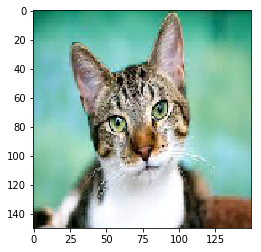

In [40]:
predictImage(r"/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Binary-Image-Classification-Using-Keras/prediction_images/3.jpg")